# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import cost, Minuit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# import scienceplots
# plt.style.use(['science','notebook', 'grid'])

In [3]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'

## Data reader

In [4]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

[(0.0, 51.0), (0.0, 518.3226)]

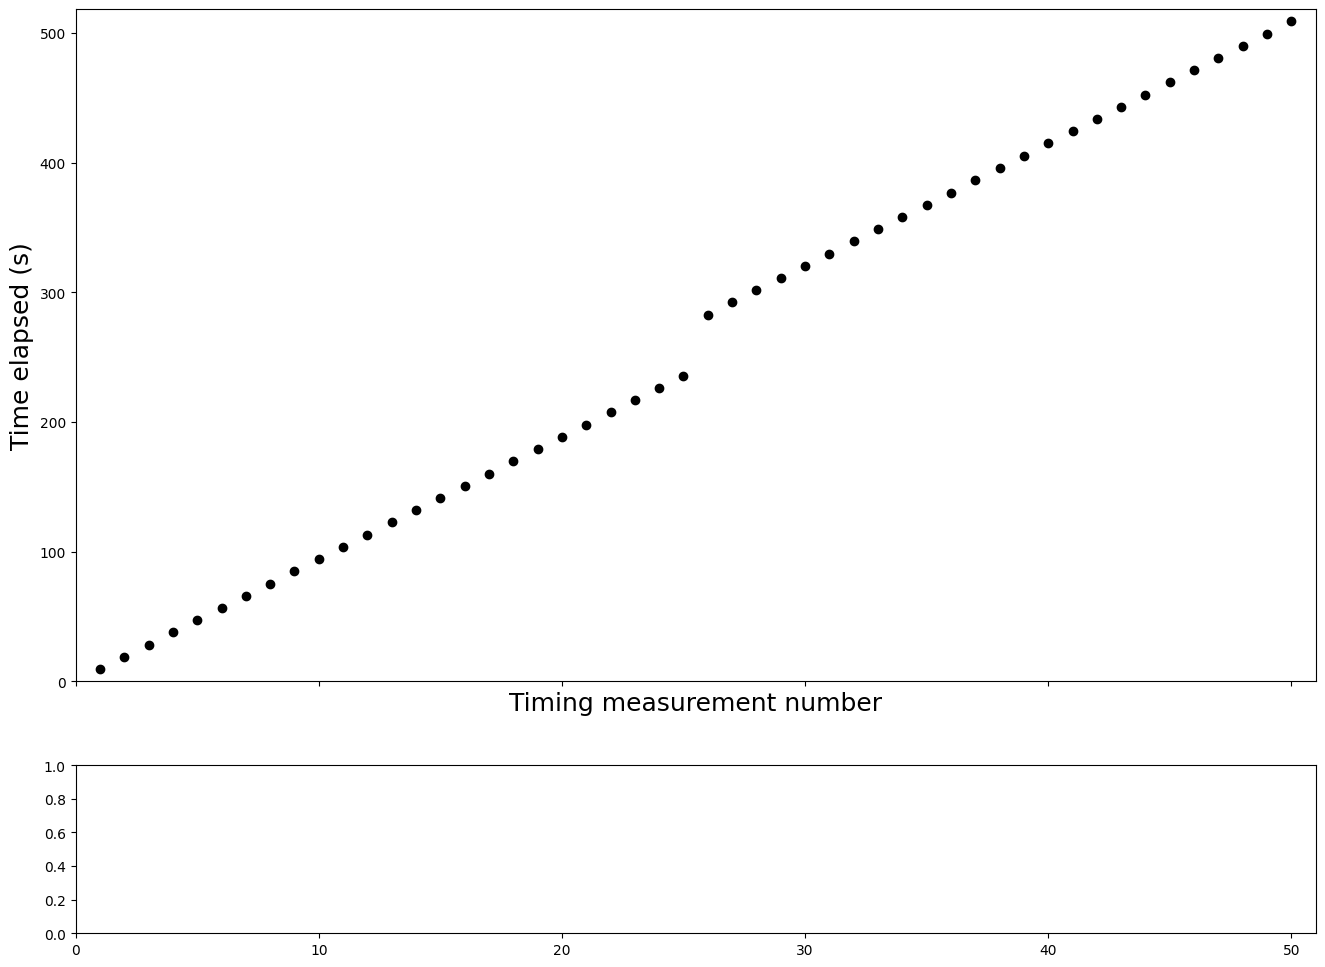

In [5]:
data0 = read_data('villads_time.dat')
data1 = read_data('magnus_timer.dat')
data2 = read_data('Chris_time.dat')
n, t = data0['n'], data0['t_s']


# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [6]:
data = [data0, data1, data2]

def fit(N, a, b, c):
    return np.where(N > 25, a * N + b + c, a * N + b)

# for data_item in data:

mfit0 = cost.LeastSquares(data0['n'], data0['t_s'], 1.0, fit)
mfit0 = Minuit(mfit0, a=10, b=0, c = 4)
mfit0.migrad()

# print(mfit.values['c']/mfit.values['a'])

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1463 (χ²/ndof = 0.0)     │              Nfcn = 59               │
│ EDM = 1.13e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.428   │   0.020   │            │            │         │         │       │
│ 1 │ b    │   -0.03   │   0.32    │            │            │         │         │       │
│ 2 │ c    │   37.7    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 0.000385  -5.0e-3  -9.6e-3 │
│ b │  -5.0e-3    0.105     0.09 │
│ c │  -9.6e-3     0.09     0.32 │
└───┴────────────────────────────┘

In [7]:
mfit1 = cost.LeastSquares(data1['n'], data1['t_s'], 10.0, fit)
mfit1 = Minuit(mfit1, a=10, b=0, c = 4)
mfit1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0004832 (χ²/ndof = 0.0)  │              Nfcn = 55               │
│ EDM = 6.04e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   9.43    │   0.20    │            │            │         │         │       │
│ 1 │ b    │   -0.1    │    3.2    │            │            │         │         │       │
│ 2 │ c    │    38     │     6     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │ 0.0385  -0.50  -0.96 │
│ b │  -0.50   10.5      8 │
│ c │  -0.96      8     32 │
└───┴──────────────────────┘

In [114]:
mfit2 = cost.LeastSquares(data2['n'], data2['t_s'], np.ones(len(data2['t_s'])) * 0.25, fit)
mfit2 = Minuit(mfit2, a=10, b=0, c = 4)
mfit2.migrad()


def pendulumFit(data, err = 0.25, show_plots = False, path = None):
    xaxis = data['n']
    mfit = cost.LeastSquares(xaxis, data['t_s'], np.ones(len(data['n'])) * err, fit)
    mfit = Minuit(mfit, a = 10, b = 0, c = 4)
    mfit.migrad()
    a = mfit.values['a']
    b = mfit.values['b']
    c = mfit.values['c']
    print(f'Period (a): {a} | b: {b} | c: {c} | {mfit.errors['a']}')

    model_y = fit(xaxis, a, b, c)
    resi = data['t_s'] - model_y


    if show_plots:


        


        fig, ax = plt.subplots(figsize = (14, 7))

        ax.grid()
        ax.plot(data['n'], model_y)
        ax.scatter(xaxis, data['t_s'], marker = 'o', c = 'black', zorder = 10, label = 'Data')


        inset = inset_axes(ax, width="30%", height="30%", loc="center right")
        inset.hist(resi)
        inset.set_title("Period residuals", fontsize=10)
        inset.set_xlabel("Period [s]", fontsize = 8)
        ax.set_xlabel('# Measurement')
        ax.set_ylabel("Elapsed Time [s]")
        ax.set_ylim(-140, 550)
        ax.set_xlim(-1, 51)

        ax2 = ax.twinx()
        ax2.hlines(0, -50, 55, color = 'black')
        ax2.hlines(np.std(resi), -50, 55, color = 'black', linestyles='--', label = r'$\pm \sigma$')
        ax2.hlines(-np.std(resi), -50, 55, color = 'black', linestyles='--')

        ax2.errorbar(
            xaxis,
            resi,
            yerr=np.std(resi),
            fmt='.',
            markerfacecolor='black',
            markeredgecolor='black',
            ecolor='red',
            elinewidth=1,
            capsize=3,
            label = "Residuals"

        )

        ax2.set_ylabel("Residuals")
        ax2.set_ylim(-0.25, 1.5)

        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()

        ax.legend(
            handles1 + handles2,
            labels1 + labels2,
            loc='best',
            title = rf"Result of fit: T = {a:.2f} $\pm$ {np.std(resi):.2f} s"
        )


    print("----------------------------------------------------")
    print(f"Period: {a} +- {np.std(resi)}")
    print("----------------------------------------------------")

    if path:
        plt.savefig(path, dpi = 600)
    plt.show()
    return a, np.std(resi)




Period (a): 9.4280064615149 | b: -0.027088000717832017 | c: 37.669266460860314 | 0.004902903139524025
----------------------------------------------------
Period: 9.4280064615149 +- 0.054095254255089216
----------------------------------------------------


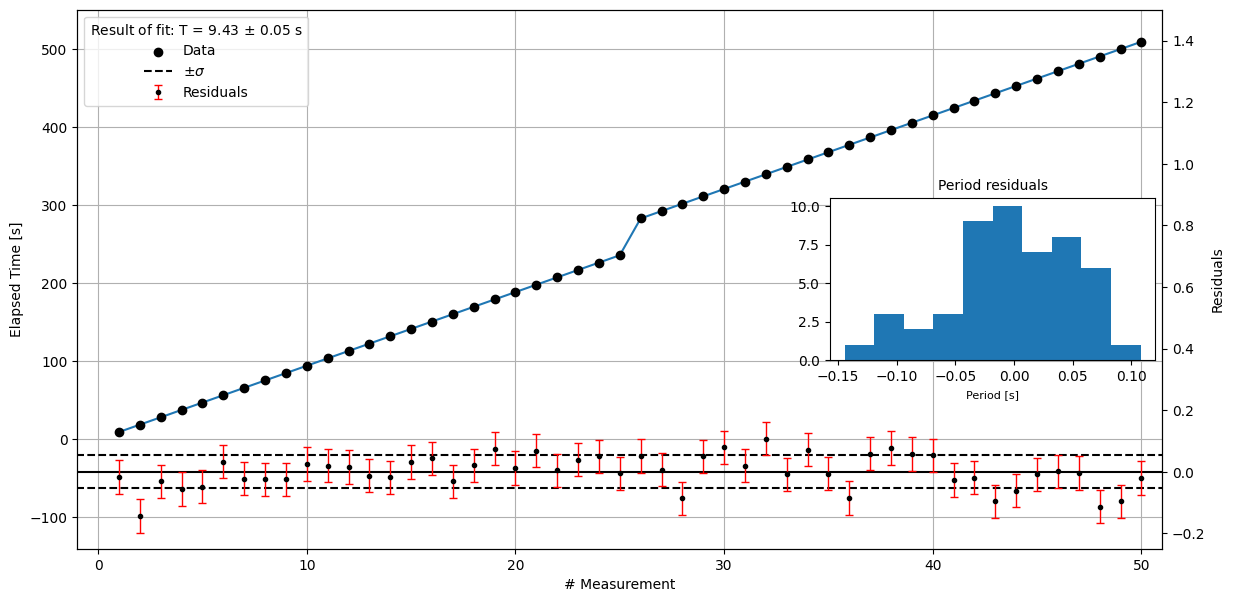

Period (a): 9.425272615390211 | b: -0.14514799982152127 | c: 37.70736861552912 | 0.004902903112824217
----------------------------------------------------
Period: 9.425272615390211 +- 0.03108698113853904
----------------------------------------------------


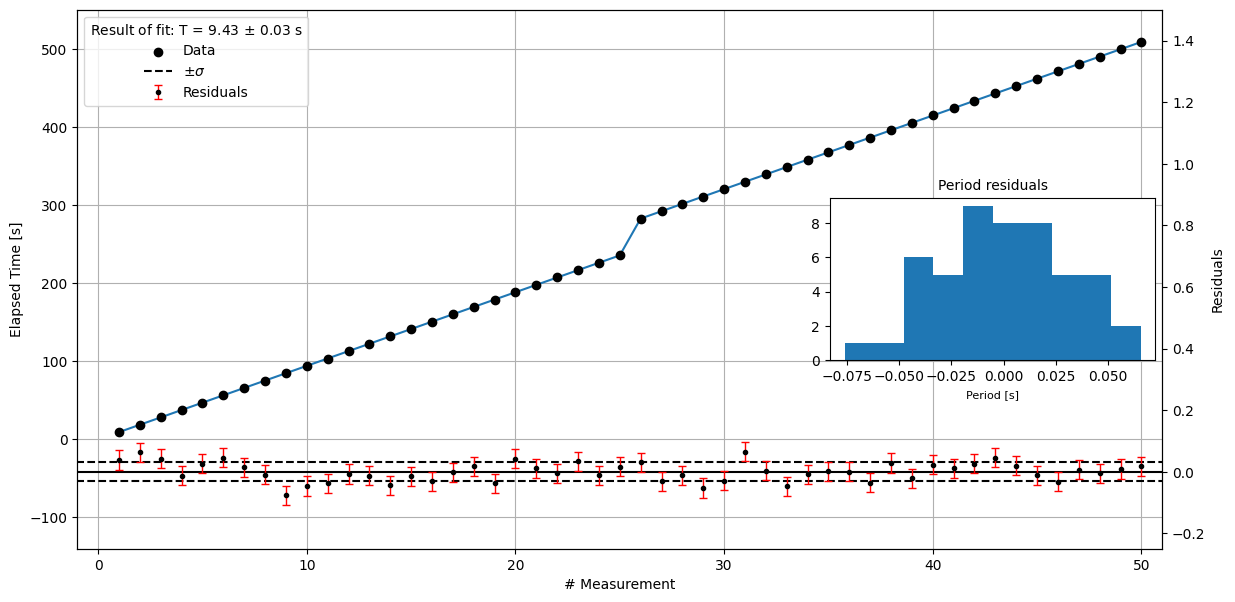

Period (a): 9.426565961564496 | b: -0.04470149716276772 | c: 37.68669895760077 | 0.004902903387144518
----------------------------------------------------
Period: 9.426565961564496 +- 0.04078902764130719
----------------------------------------------------


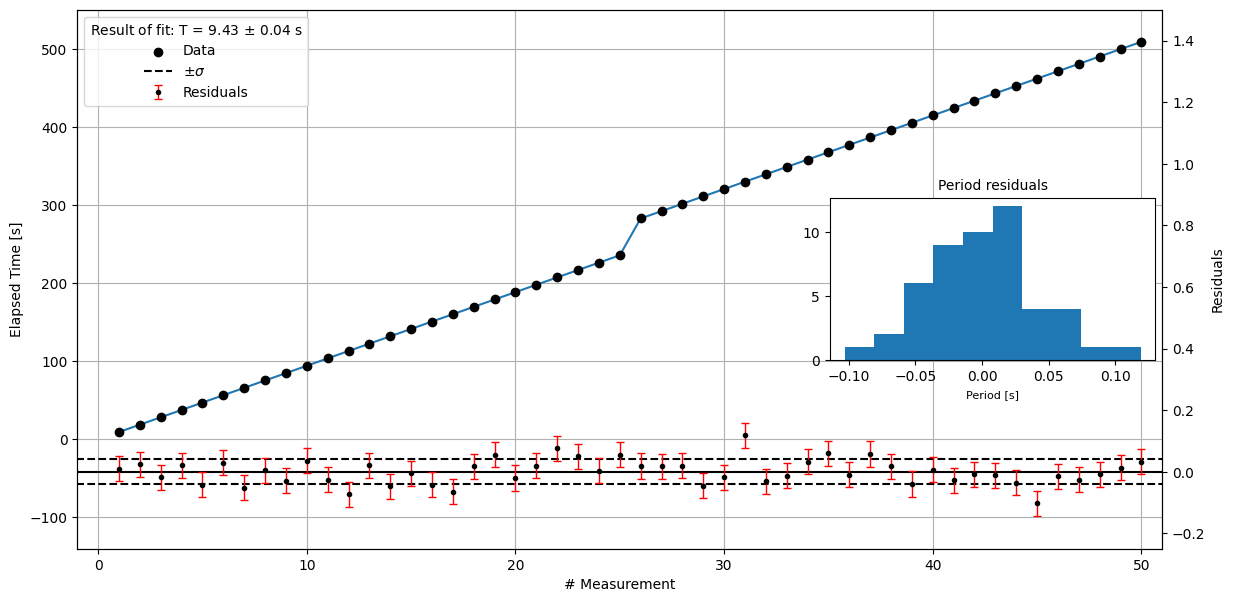

In [116]:
t_0, err_0 = pendulumFit(data0, show_plots=True)
t_1, err_1 = pendulumFit(data1, show_plots=True)
t_2, err_2 = pendulumFit(data2, show_plots=True)